<img src='../img/dust_banner.png' alt='Training school and workshop on dust' align='center' width='100%'></img>

<br>

# AERONET

### About

The [AERONET (AErosol RObotic NETwork)](https://aeronet.gsfc.nasa.gov/new_web/index.html) project is a federation of ground-based remote sensing aerosol networks established by NASA and LOA-PHOTONS (CNRS) and is greatly expanded by collaborators from national agencies, institutes, universities, individual scientists, and partners. The program provides a long-term (more than 25 years), continuous and readily accessible public domain database of aerosol optical, microphysical and radiative properties for aerosol research and characterization, validation of satellite retrievals, and synergism with other databases. The network imposes standardization of instruments, calibration, processing and distribution.

AERONET collaboration provides globally distributed observations of spectral aerosol optical Depth (AOD), inversion products, and precipitable water in diverse aerosol regimes. Aerosol optical depth data are computed for three data quality levels: Level 1.0 (unscreened), Level 1.5 (cloud-screened), and Level 2.0 (cloud screened and quality-assured). Inversions, precipitable water, and other AOD-dependent products are derived from these levels and may implement additional quality checks.

You can see an overview of all available AERONET Site Names [here](https://aeronet.gsfc.nasa.gov/cgi-bin/draw_map_display_aod_v3?long1=-180&long2=180&lat1=-90&lat2=90&multiplier=2&what_map=4&nachal=1&formatter=0&level=3&place_code=10&place_limit=0).

### Basic Facts

> **Spatial coverage**: `Observation stations worldwide` <br>
> **Temporal resolution**:  `sub-daily and daily` <br>
> **Temporal coverage**: `since 1993` <br>
> **Data format**: `txt` <br>
> **Versions**: `Level 1.0 (unscreened)`, `Level 1.5 (cloud-screened)`, `Level 2.0 (cloud screened and quality-assured)`


### How to access the data

AERONET offers a web service which allows you to request and save aeronet data via wget, which is a command to download files from the internet. The AERONET web service endpoint is available under https://aeronet.gsfc.nasa.gov/cgi-bin/print_web_data_v3 and a detailed documentation of how to construct requests can be found here.

The first part of this notebook ([1 - Download AERONET data for a specific station and time period](#aeronet_download)) shows you how to request AERONET data with a `wget` command.


### Module outline
* [1 - Download AERONET data for a specific station and time period](#aeronet_download)
* [2 - Read the observation data with pandas](#read_aeronet)
* [3 - Visualize all points of AERONET Aerosol Optical Depth in Palma de Mallorca for February 2021](#visualize_all_points)
* [4 - Load and visualize daily Aerosol Optical Depth aggregates together with the Angstrom Exponent](#daily_angstrom)

<hr>

#### Load libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wget

<hr>

## <a id='aeronet_download'></a>1. Download AERONET data for a specific station and time period

AERONET offers a web service which allows you to request and save aeronet data via `wget`, which is a command to download files from the internet. The AERONET web service endpoint is available under https://aeronet.gsfc.nasa.gov/cgi-bin/print_web_data_v3 and a detailed documentation of how to construct requests can be found [here](https://aeronet.gsfc.nasa.gov/print_web_data_help_v3_new.html).

An example request from the website looks like this:

`wget --no-check-certificate  -q  -O test.out "https://aeronet.gsfc.nasa.gov/cgi-bin/print_web_data_v3?site=Cart_Site&year=2000&month=6&day=1&year2=2000&month2=6&day2=14&AOD15=1&AVG=10"`

In this request, you use `wget` to download data from the webservice. You tailor your request with a set of keywords which you concatenate to the service endpoint with `&`. However, constructing such requests manually can be quite cumbersome. For this reason, we will show you an approach how you can dynamically generate and request AERONET data from the web service with Python.


As a first step, let us create a Python dictionary in which we store all the parameters we would like to use for the request as dictionary keys. You can initiate a dictionary with curled brackets `{}`. Below, we specify the following parameters:
* `endpoint`: Endpoint of the AERONET web service
* `station`: Name of the AERONET station
* `year`: year 1 of interest
* `month`: month 1 of interest
* `day`: day 1 of interest
* `year2`: year 2 of interest
* `month2`: month 2 of interest
* `day2`: day 2 of interest
* `AOD15`: data type, other options include `AOD10`, `AOD20`, etc.
* `AVG`: data format, `AVG=10` - all points, `AVG=20` - daily averages

Please note, that there are additional parameters that can be set, e.g. `hour`. The keywords below are those we will need for requesting all data points of Aerosol Optical Depth Level 1.5 data for the station Palma de Mallorca for February 2021.

In [1]:
data_dict = {
    'endpoint': 'https://aeronet.gsfc.nasa.gov/cgi-bin/print_web_data_v3',
    'station':'Palma_de_Mallorca',
    'year': 2021,
    'month': 2,
    'day': 1,
    'year2': 2021,
    'month2': 2,
    'day2': 28,
    'AOD15': 1,
    'AVG': 10
}


<br>

In a next step, we construct the final string for the wget request with the `format` function. You construct a string by adding the dictionary keys in curled brackets. At the end of the string, you provide the dictionary key informatoin to the string with the `format()` function. A print of the resulting url shows, that the format function replaced the information in the curled brackets with the data in the dictionary.

In [4]:
url = '{endpoint}?site={station}&year={year}&month={month}&day={day}&year2={year2}&month2={month2}&day2={day2}&AOD15={AOD15}&AVG={AVG}'.format(**data_dict)
url

'https://aeronet.gsfc.nasa.gov/cgi-bin/print_web_data_v3?site=Palma_de_Mallorca&year=2021&month=2&day=1&year2=2021&month2=2&day2=28&AOD15=1&AVG=10'

<br>

Now we are ready to request the data with the function `download()` from the wget Python library. You have to pass to the function the constructed url above together with a file path of where the downloaded that shall be stored. Let us store the data as `txt` file in the folder `../data/2_observations/aeronet/`.

In [5]:
wget.download(url, '../data/2_observations/aeronet/202102_palma_aod15_10.txt')

'../data/2_observations/aeronet/202102_palma_aod15_10 (1).txt'

<br>

Let us repeat the data request and let us also request the daily average of Aerosol Optical Depth for February 2021 for the station Palma de Mallorca. The parameter you have to change is `AVG`. By setting `20`, you indicate the request that you are interested in daily averages. You can make the required changes in the dictionary above and re-run the data request. Make sure to also change the name of the output file to e.g. `202102_palma_aod15_20.txt`.

<br>

## <a id='read_aeronet'></a>2. Read the observation data with pandas

The next step is now to read the downloaded txt file. Let us start with the file of all station measurements for the station Palma de Mallorca in February 2021. The file has the name `202102_palma_aod15_10.txt`. You can read `txt` files with the function `read_table` from the Python library `pandas`. If you inspect the txt file before (you can simply open it), you see that the first few lines contain information we do not need in the pandas dataframe. For this reason, we can set additonal keyword arguments that allow us to specify the columns and rows of interest:
* `delimiter`: specify the delimiter in the text file, e.g. comma
* `header`: specify the index of the row that shall be set as header.
* `index_col`: specify the index of the column that shall be set as index

You see below that the resulting dataframe has 258 rows and 113 columns.

In [84]:
df = pd.read_table('../data/2_observations/aeronet/202102_palma_aod15_10.txt', delimiter=',', header=[7], index_col=1)
df

,AERONET_Site,Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,...,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_340nm,Exact_Wavelengths_of_PW(um)_935nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty.1,Exact_Wavelengths_of_AOD(um)_Empty.2,Exact_Wavelengths_of_AOD(um)_Empty.3,Exact_Wavelengths_of_AOD(um)_Empty<br>
Date(dd:mm:yyyy),,,,,,,,,,,,,,,,,,,,,
01:02:2021,Palma_de_Mallorca,07:51:31,32.0,32.327442,-999.0,0.047363,0.051125,-999.0,-999.0,0.054040,...,0.3806,0.3407,0.9350,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.<br>
01:02:2021,Palma_de_Mallorca,07:55:22,32.0,32.330116,-999.0,0.049941,0.053621,-999.0,-999.0,0.056214,...,0.3806,0.3407,0.9350,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.<br>
01:02:2021,Palma_de_Mallorca,08:00:00,32.0,32.333333,-999.0,0.054279,0.058240,-999.0,-999.0,0.061025,...,0.3806,0.3407,0.9350,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.<br>
01:02:2021,Palma_de_Mallorca,08:05:26,32.0,32.337106,-999.0,0.048314,0.052426,-999.0,-999.0,0.055008,...,0.3806,0.3407,0.9350,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.<br>
01:02:2021,Palma_de_Mallorca,08:12:02,32.0,32.341690,-999.0,0.046866,0.050713,-999.0,-999.0,0.053161,...,0.3806,0.3407,0.9350,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.<br>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21:02:2021,Palma_de_Mallorca,08:17:06,52.0,52.345208,-999.0,0.656322,0.681146,-999.0,-999.0,0.700608,...,0.3806,0.3409,0.9349,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.<br>
21:02:2021,Palma_de_Mallorca,08:42:16,52.0,52.362685,-999.0,0.626930,0.648986,-999.0,-999.0,0.666602,...,0.3806,0.3409,0.9349,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.<br>
21:02:2021,Palma_de_Mallorca,14:34:25,52.0,52.607234,-999.0,2.027537,2.092611,-999.0,-999.0,2.142720,...,0.3806,0.3409,0.9349,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.<br>


<br>

In the dataframe above, you see that missing data entries are filled with -999.0. Let us replace those as `NaN`. You can use the function `replace()` to do so. The resulting dataframe has now `NaN` (not a number) for all entries with missing data. This replacement facilitates the plotting of the data. 

In [85]:
df = df.replace(-999.0, np.nan)
df

,AERONET_Site,Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,...,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_340nm,Exact_Wavelengths_of_PW(um)_935nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty.1,Exact_Wavelengths_of_AOD(um)_Empty.2,Exact_Wavelengths_of_AOD(um)_Empty.3,Exact_Wavelengths_of_AOD(um)_Empty<br>
Date(dd:mm:yyyy),,,,,,,,,,,,,,,,,,,,,
01:02:2021,Palma_de_Mallorca,07:51:31,32.0,32.327442,NaN,0.047363,0.051125,NaN,NaN,0.054040,...,0.3806,0.3407,0.9350,NaN,NaN,NaN,NaN,NaN,NaN,-999.<br>
01:02:2021,Palma_de_Mallorca,07:55:22,32.0,32.330116,NaN,0.049941,0.053621,NaN,NaN,0.056214,...,0.3806,0.3407,0.9350,NaN,NaN,NaN,NaN,NaN,NaN,-999.<br>
01:02:2021,Palma_de_Mallorca,08:00:00,32.0,32.333333,NaN,0.054279,0.058240,NaN,NaN,0.061025,...,0.3806,0.3407,0.9350,NaN,NaN,NaN,NaN,NaN,NaN,-999.<br>
01:02:2021,Palma_de_Mallorca,08:05:26,32.0,32.337106,NaN,0.048314,0.052426,NaN,NaN,0.055008,...,0.3806,0.3407,0.9350,NaN,NaN,NaN,NaN,NaN,NaN,-999.<br>
01:02:2021,Palma_de_Mallorca,08:12:02,32.0,32.341690,NaN,0.046866,0.050713,NaN,NaN,0.053161,...,0.3806,0.3407,0.9350,NaN,NaN,NaN,NaN,NaN,NaN,-999.<br>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21:02:2021,Palma_de_Mallorca,08:17:06,52.0,52.345208,NaN,0.656322,0.681146,NaN,NaN,0.700608,...,0.3806,0.3409,0.9349,NaN,NaN,NaN,NaN,NaN,NaN,-999.<br>
21:02:2021,Palma_de_Mallorca,08:42:16,52.0,52.362685,NaN,0.626930,0.648986,NaN,NaN,0.666602,...,0.3806,0.3409,0.9349,NaN,NaN,NaN,NaN,NaN,NaN,-999.<br>
21:02:2021,Palma_de_Mallorca,14:34:25,52.0,52.607234,NaN,2.027537,2.092611,NaN,NaN,2.142720,...,0.3806,0.3409,0.9349,NaN,NaN,NaN,NaN,NaN,NaN,-999.<br>


<br>

To get a complete overview of all column information, you can print a list of all column headers. You can do this with the function `columns.to_list()`.

In [86]:
df.columns.to_list()

['AERONET_Site',
 'Time(hh:mm:ss)',
 'Day_of_Year',
 'Day_of_Year(Fraction)',
 'AOD_1640nm',
 'AOD_1020nm',
 'AOD_870nm',
 'AOD_865nm',
 'AOD_779nm',
 'AOD_675nm',
 'AOD_667nm',
 'AOD_620nm',
 'AOD_560nm',
 'AOD_555nm',
 'AOD_551nm',
 'AOD_532nm',
 'AOD_531nm',
 'AOD_510nm',
 'AOD_500nm',
 'AOD_490nm',
 'AOD_443nm',
 'AOD_440nm',
 'AOD_412nm',
 'AOD_400nm',
 'AOD_380nm',
 'AOD_340nm',
 'Precipitable_Water(cm)',
 'AOD_681nm',
 'AOD_709nm',
 'AOD_Empty',
 'AOD_Empty.1',
 'AOD_Empty.2',
 'AOD_Empty.3',
 'AOD_Empty.4',
 'Triplet_Variability_1640',
 'Triplet_Variability_1020',
 'Triplet_Variability_870',
 'Triplet_Variability_865',
 'Triplet_Variability_779',
 'Triplet_Variability_675',
 'Triplet_Variability_667',
 'Triplet_Variability_620',
 'Triplet_Variability_560',
 'Triplet_Variability_555',
 'Triplet_Variability_551',
 'Triplet_Variability_532',
 'Triplet_Variability_531',
 'Triplet_Variability_510',
 'Triplet_Variability_500',
 'Triplet_Variability_490',
 'Triplet_Variability_443',
 

<br>

If you would like to narrow down the selection of the dataframe, you can apply the `filter` function and filter the dataframe based on a given regular expression. For example, let us only select the columns that contain `Angstrom_Exponent` information and additionally only select the first 100 rows.

This selection shows you that the station does not provide measurements for each day. The first measurements are for 2 February and the measurements are again continued on 6 February 2021. 

In [87]:
df.filter(regex='Angstrom*')[0:100]

,440-870_Angstrom_Exponent,380-500_Angstrom_Exponent,440-675_Angstrom_Exponent,500-870_Angstrom_Exponent,340-440_Angstrom_Exponent,440-675_Angstrom_Exponent[Polar]
Date(dd:mm:yyyy),,,,,,
01:02:2021,0.270212,0.159832,0.276881,0.328898,0.027728,NaN
01:02:2021,0.243484,0.159586,0.254570,0.295964,0.025960,NaN
01:02:2021,0.237145,0.209421,0.250409,0.275588,0.028077,NaN
01:02:2021,0.279986,0.204115,0.306049,0.333502,0.063031,NaN
01:02:2021,0.269313,0.226397,0.293357,0.318835,0.000777,NaN
...,...,...,...,...,...,...
07:02:2021,1.030660,1.059157,1.066371,1.018489,0.680684,NaN
07:02:2021,1.016488,1.089124,1.023302,1.044181,0.860430,NaN
07:02:2021,0.981988,1.041963,0.999642,1.004310,0.930398,NaN


<br>

## <a id='visualize_all_points'></a>3. Visualize all points of AERONET Aerosol Optical Depth in Palma de Mallorca for February 2021

The next step is to visualize all points of Aerosol Optical Depth at different wavelengths in Palma de Mallorca for February 2021. We specifically want to plot the AOD information for which we have measurements, which are the following: `AOD_1640nm`, `AOD_1020nm`, `AOD_870nm`, `AOD_675nm`, `AOD_500nm`, `AOD_440nm`, `AOD_380nm` and `AOD_340nm`. 

You can use the built-in `plot()` function of the pandas library to define a line plot. With the `filter` function, you can select the dataframe columns you wish to visualize. The visualisation code below consists of five main parts:
* `Initiate a matplotlib figure`
* `Define a line plot with the built-in plot function of the pandas library`
* `Set title and axes label information`
* `Format axes ticks`
* `Add additional features, such as a grid or legend`

Below, you see that the Aerosol Optical Depth increases between the 5th and 7th February 2021 as well as around the 21st February 2021.

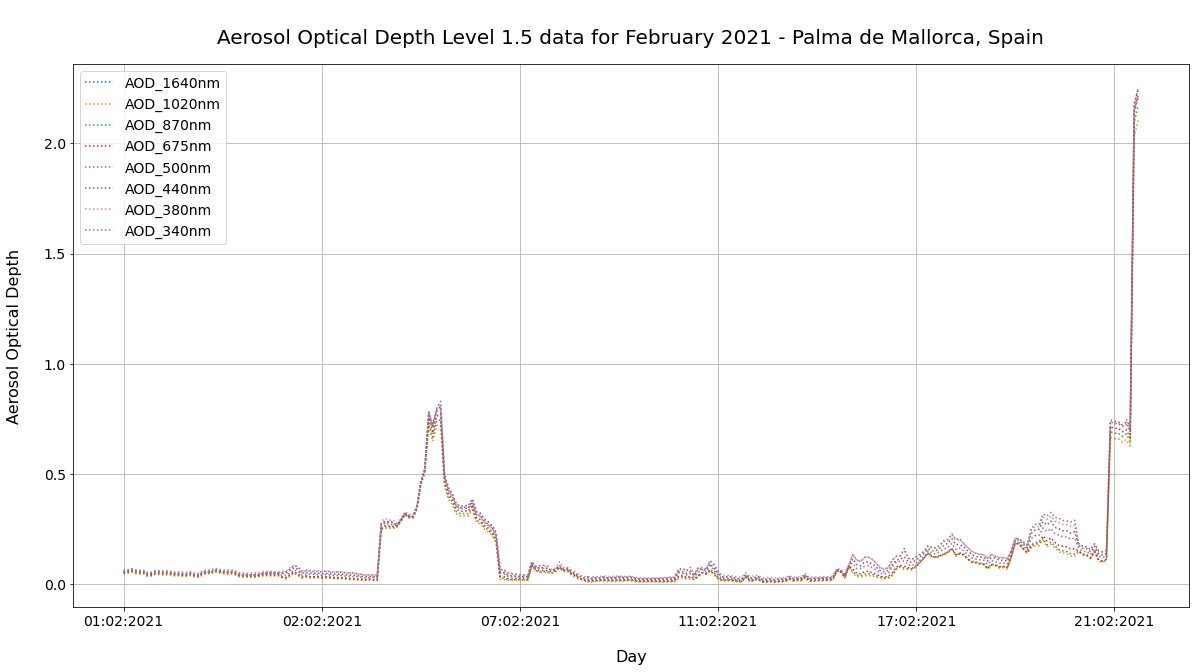

In [88]:
# Initiate a matplotlib figure
fig = plt.figure(figsize=(20,10))
ax=plt.axes()

# Select pandas dataframe columns and define a line plot
df.filter(['AOD_1640nm', 
           'AOD_1020nm', 
           'AOD_870nm', 
           'AOD_675nm', 
           'AOD_500nm', 
           'AOD_440nm', 
           'AOD_380nm', 
           'AOD_340nm']).plot(ax=ax,
                             linestyle='dotted')


# Set title and axes lable information
plt.title('\nAerosol Optical Depth Level 1.5 data for February 2021 - Palma de Mallorca, Spain', fontsize=20, pad=20)
plt.ylabel('Aerosol Optical Depth\n', fontsize=16)
plt.xlabel('\nDay', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add additionally a legend and grid to the plot
plt.legend(fontsize=14,loc=0)
plt.grid()


<br>

## <a id='daily_angstrom'></a>4. Load and visualize daily Aerosol Optical Depth aggregates together with the Angstrom Exponent

In a next step, we would like to visualize the Aerosol Optical Depth information together with the Angstrom Exponent in the spectral interval of 440-480nm. The Angstrom Exponent is often used as a qualitative indicator of aerosol particle size.
To visualize both variables together, we load the daily averaged AERONET information, which we stored as txt file with the name `202102_palma_aod15_20.txt`. You can use again the funcction `read_table` from the pandas library to read the txt file.

Compared to the all point information, you see that the dataframe with the daily aggregated values has only 18 rows and 81 columns. As before, we only have daily aggregated values for days where the station had measurements.

In [89]:
df_daily = pd.read_table('../data/2_observations/aeronet/202102_palma_aod15_20.txt', delimiter=',', header=[7], index_col=1)
df_daily

,AERONET_Site,Time(hh:mm:ss),Day_of_Year,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_667nm,...,N[440-675_Angstrom_Exponent],N[500-870_Angstrom_Exponent],N[340-440_Angstrom_Exponent],N[440-675_Angstrom_Exponent[Polar]],Data_Quality_Level,AERONET_Instrument_Number,AERONET_Site_Name,Site_Latitude(Degrees),Site_Longitude(Degrees),Site_Elevation(m)<br>
Date(dd:mm:yyyy),,,,,,,,,,,,,,,,,,,,,
01:02:2021,Palma_de_Mallorca,12:00:00,32.0,-999.0,0.041358,0.046188,-999.0,-999.0,0.047507,-999.0,...,40.0,40.0,40.0,0.0,lev15,413.0,Palma_de_Mallorca,39.5533,2.6251,10.000000<br>
02:02:2021,Palma_de_Mallorca,12:00:00,33.0,-999.0,0.026389,0.030578,-999.0,-999.0,0.031932,-999.0,...,25.0,25.0,25.0,0.0,lev15,413.0,Palma_de_Mallorca,39.5533,2.6251,10.000000<br>
05:02:2021,Palma_de_Mallorca,12:00:00,36.0,-999.0,0.314632,0.320905,-999.0,-999.0,0.322314,-999.0,...,12.0,12.0,12.0,0.0,lev15,413.0,Palma_de_Mallorca,39.5533,2.6251,10.000000<br>
06:02:2021,Palma_de_Mallorca,12:00:00,37.0,-999.0,0.390481,0.403033,-999.0,-999.0,0.416656,-999.0,...,18.0,18.0,18.0,0.0,lev15,413.0,Palma_de_Mallorca,39.5533,2.6251,10.000000<br>
07:02:2021,Palma_de_Mallorca,12:00:00,38.0,-999.0,0.018484,0.022325,-999.0,-999.0,0.027846,-999.0,...,8.0,8.0,8.0,0.0,lev15,413.0,Palma_de_Mallorca,39.5533,2.6251,10.000000<br>
08:02:2021,Palma_de_Mallorca,12:00:00,39.0,-999.0,0.061658,0.064412,-999.0,-999.0,0.068323,-999.0,...,5.0,5.0,5.0,0.0,lev15,413.0,Palma_de_Mallorca,39.5533,2.6251,10.000000<br>
10:02:2021,Palma_de_Mallorca,12:00:00,41.0,-999.0,0.021677,0.024864,-999.0,-999.0,0.027581,-999.0,...,32.0,32.0,32.0,0.0,lev15,413.0,Palma_de_Mallorca,39.5533,2.6251,10.000000<br>
11:02:2021,Palma_de_Mallorca,12:00:00,42.0,-999.0,0.023739,0.027394,-999.0,-999.0,0.028055,-999.0,...,44.0,44.0,44.0,0.0,lev15,413.0,Palma_de_Mallorca,39.5533,2.6251,10.000000<br>
13:02:2021,Palma_de_Mallorca,12:00:00,44.0,-999.0,0.034328,0.041274,-999.0,-999.0,0.049019,-999.0,...,11.0,11.0,11.0,0.0,lev15,413.0,Palma_de_Mallorca,39.5533,2.6251,10.000000<br>


<br>

The next step is again to replace the value for missing data (-999.0) as `NaN`. You can do this with the function `replace()`.

In [90]:
df_daily = df_daily.replace(-999.0, np.nan)
df_daily

,AERONET_Site,Time(hh:mm:ss),Day_of_Year,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_667nm,...,N[440-675_Angstrom_Exponent],N[500-870_Angstrom_Exponent],N[340-440_Angstrom_Exponent],N[440-675_Angstrom_Exponent[Polar]],Data_Quality_Level,AERONET_Instrument_Number,AERONET_Site_Name,Site_Latitude(Degrees),Site_Longitude(Degrees),Site_Elevation(m)<br>
Date(dd:mm:yyyy),,,,,,,,,,,,,,,,,,,,,
01:02:2021,Palma_de_Mallorca,12:00:00,32.0,NaN,0.041358,0.046188,NaN,NaN,0.047507,NaN,...,40.0,40.0,40.0,0.0,lev15,413.0,Palma_de_Mallorca,39.5533,2.6251,10.000000<br>
02:02:2021,Palma_de_Mallorca,12:00:00,33.0,NaN,0.026389,0.030578,NaN,NaN,0.031932,NaN,...,25.0,25.0,25.0,0.0,lev15,413.0,Palma_de_Mallorca,39.5533,2.6251,10.000000<br>
05:02:2021,Palma_de_Mallorca,12:00:00,36.0,NaN,0.314632,0.320905,NaN,NaN,0.322314,NaN,...,12.0,12.0,12.0,0.0,lev15,413.0,Palma_de_Mallorca,39.5533,2.6251,10.000000<br>
06:02:2021,Palma_de_Mallorca,12:00:00,37.0,NaN,0.390481,0.403033,NaN,NaN,0.416656,NaN,...,18.0,18.0,18.0,0.0,lev15,413.0,Palma_de_Mallorca,39.5533,2.6251,10.000000<br>
07:02:2021,Palma_de_Mallorca,12:00:00,38.0,NaN,0.018484,0.022325,NaN,NaN,0.027846,NaN,...,8.0,8.0,8.0,0.0,lev15,413.0,Palma_de_Mallorca,39.5533,2.6251,10.000000<br>
08:02:2021,Palma_de_Mallorca,12:00:00,39.0,NaN,0.061658,0.064412,NaN,NaN,0.068323,NaN,...,5.0,5.0,5.0,0.0,lev15,413.0,Palma_de_Mallorca,39.5533,2.6251,10.000000<br>
10:02:2021,Palma_de_Mallorca,12:00:00,41.0,NaN,0.021677,0.024864,NaN,NaN,0.027581,NaN,...,32.0,32.0,32.0,0.0,lev15,413.0,Palma_de_Mallorca,39.5533,2.6251,10.000000<br>
11:02:2021,Palma_de_Mallorca,12:00:00,42.0,NaN,0.023739,0.027394,NaN,NaN,0.028055,NaN,...,44.0,44.0,44.0,0.0,lev15,413.0,Palma_de_Mallorca,39.5533,2.6251,10.000000<br>
13:02:2021,Palma_de_Mallorca,12:00:00,44.0,NaN,0.034328,0.041274,NaN,NaN,0.049019,NaN,...,11.0,11.0,11.0,0.0,lev15,413.0,Palma_de_Mallorca,39.5533,2.6251,10.000000<br>


<br>

As a final step, we can use again the plotting code from above and visualize the daily aggregated Aerosol Optical Depth information. Additionally to the AOD values as line plot, we add the `440-870_Angstrom_Exponent` column as bar plot. You can do this in a similar way. You use the pandas built-in `plot()` function and specify the keyword argument `kind='bar'`, which indicates the function to plot a bar graph.


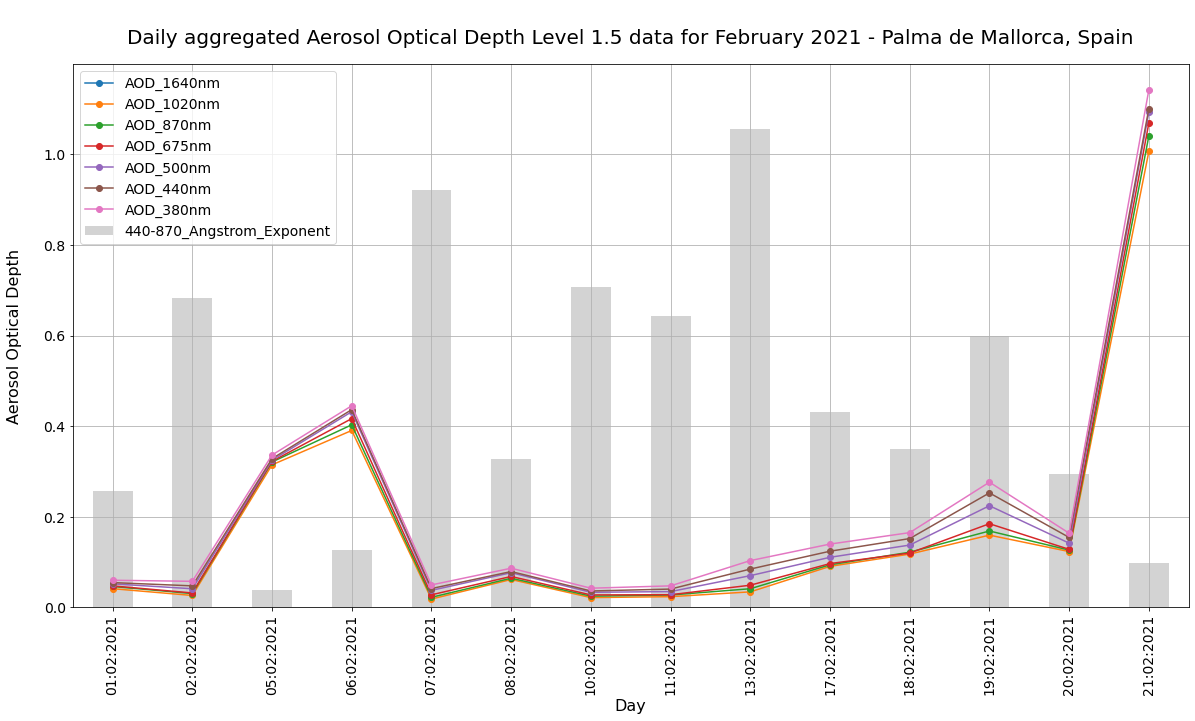

In [91]:
# Initiate a matplotlib figure
fig = plt.figure(figsize=(20,10))
ax=plt.axes()

# Select pandas dataframe columns and define a line plot and bar plot
df_daily.filter(['AOD_1640nm', 
           'AOD_1020nm', 
           'AOD_870nm', 
           'AOD_675nm', 
           'AOD_500nm', 
           'AOD_440nm', 
           'AOD_380nm', 
           'AOD_340nm'][:-1]).plot(ax=ax,
                             style='o-')

df_daily['440-870_Angstrom_Exponent'][:-1].plot(kind='bar', color='lightgrey')

# Set title and axes lable information
plt.title('\nDaily aggregated Aerosol Optical Depth Level 1.5 data for February 2021 - Palma de Mallorca, Spain', fontsize=20, pad=20)
plt.ylabel('Aerosol Optical Depth\n', fontsize=16)
plt.xlabel('Day', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add additionally a legend and grid to the plot
plt.legend(fontsize=14,loc=0)
plt.grid()


<br>

Above, you see elevated AOD values and low values for the Angstrom exponent for the Saharan dust event between 5 to 7 February 2021. Additionally, the time-series shows that there might have been a second dust event towards the end of February 2021, that had even a stronger impact on the station in Palma de Mallorca. Let us inspect the daily aggregated values of AOD of another station, e.g. Ispra in Northern Italy for February 2021.

<br>

## 5. Load and visualize Aerosol Optical Depth and Angstrom Exponent for station *Ispra* in February 2021

Let us load the daily aggregated Aerosol Optical Depth values for station Ispra in north Italy for February 2021. 

In [92]:
df_ispra = pd.read_table('../data/2_observations/aeronet/202102_ispra_aod15_20.txt', delimiter=',', header=[7], index_col=1)
df_ispra = df_ispra.replace(-999.0, np.nan)
df_ispra

,AERONET_Site,Time(hh:mm:ss),Day_of_Year,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_667nm,...,N[440-675_Angstrom_Exponent],N[500-870_Angstrom_Exponent],N[340-440_Angstrom_Exponent],N[440-675_Angstrom_Exponent[Polar]],Data_Quality_Level,AERONET_Instrument_Number,AERONET_Site_Name,Site_Latitude(Degrees),Site_Longitude(Degrees),Site_Elevation(m)<br>
Date(dd:mm:yyyy),,,,,,,,,,,,,,,,,,,,,
02:02:2021,Ispra,12:00:00,33.0,NaN,0.057813,NaN,0.080397,0.098809,NaN,0.129885,...,43.0,0.0,0.0,0.0,lev15,1013.0,Ispra,45.80305,8.6267,235.000000<br>
04:02:2021,Ispra,12:00:00,35.0,NaN,0.018198,NaN,0.022578,0.026341,NaN,0.031169,...,18.0,0.0,0.0,0.0,lev15,1013.0,Ispra,45.80305,8.6267,235.000000<br>
05:02:2021,Ispra,12:00:00,36.0,NaN,0.084258,NaN,0.096073,0.106207,NaN,0.122432,...,11.0,0.0,0.0,0.0,lev15,1013.0,Ispra,45.80305,8.6267,235.000000<br>
08:02:2021,Ispra,12:00:00,39.0,NaN,0.015402,NaN,0.017653,0.020487,NaN,0.021784,...,44.0,0.0,0.0,0.0,lev15,1303.0,Ispra,45.80305,8.6267,235.000000<br>
09:02:2021,Ispra,12:00:00,40.0,NaN,0.037469,NaN,0.042969,0.048889,NaN,0.057431,...,44.0,0.0,0.0,0.0,lev15,1303.0,Ispra,45.80305,8.6267,235.000000<br>
10:02:2021,Ispra,12:00:00,41.0,NaN,0.021387,NaN,0.025464,0.030168,NaN,0.035733,...,21.0,0.0,0.0,0.0,lev15,1303.0,Ispra,45.80305,8.6267,235.000000<br>
11:02:2021,Ispra,12:00:00,42.0,NaN,0.017402,NaN,0.019987,0.023011,NaN,0.024886,...,102.0,0.0,0.0,0.0,lev15,1303.0,Ispra,45.80305,8.6267,235.000000<br>
14:02:2021,Ispra,12:00:00,45.0,NaN,0.020938,NaN,0.026931,0.032290,NaN,0.040545,...,96.0,0.0,0.0,0.0,lev15,1013.0,Ispra,45.80305,8.6267,235.000000<br>
15:02:2021,Ispra,12:00:00,46.0,NaN,0.028549,NaN,0.033490,0.038126,NaN,0.044876,...,64.0,0.0,0.0,0.0,lev15,1013.0,Ispra,45.80305,8.6267,235.000000<br>


<br>

And now, let us use again the plotting code from above and visualize the daily aggregated Aerosol Optical Depth information for Ispra in February 2021. Additionally to the AOD values as line plot, we add the `440-870_Angstrom_Exponent` column as bar plot. You see, that Ispra has elevated AOD measurements for a second Saharan dust event, which took place between 21 and 24 February 2021.

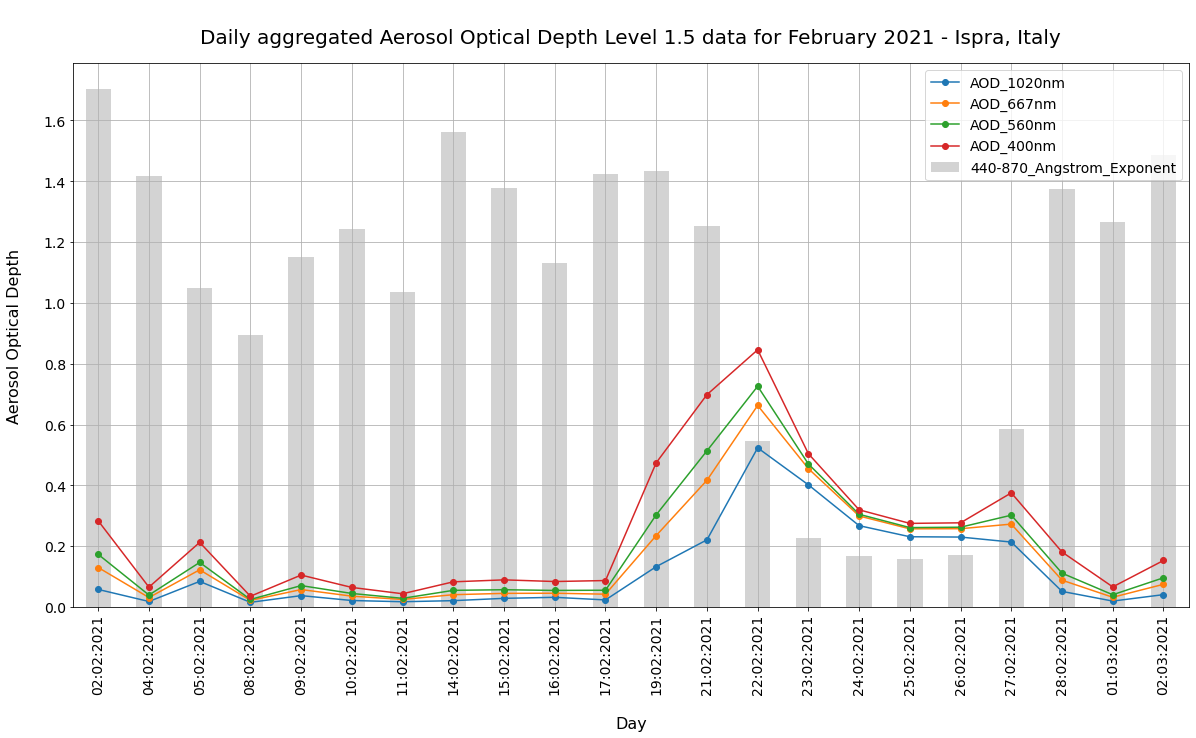

In [93]:
# Initiate a matplotlib figure
fig = plt.figure(figsize=(20,10))
ax=plt.axes()

# Select pandas dataframe columns and define a line plot and bar plot
df_ispra.filter(['AOD_1020nm',  
           'AOD_667nm', 
           'AOD_560nm',
           'AOD_400nm', 
           'AOD_400nm'][:-1]).plot(ax=ax,
                             style='o-')

df_ispra['440-870_Angstrom_Exponent'][:-1].plot(kind='bar', color='lightgrey')

# Set title and axes lable information
plt.title('\nDaily aggregated Aerosol Optical Depth Level 1.5 data for February 2021 - Ispra, Italy', fontsize=20, pad=20)
plt.ylabel('Aerosol Optical Depth\n', fontsize=16)
plt.xlabel('\nDay', fontsize=16)

# Format the axes ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add additionally a legend and grid to the plot
plt.legend(fontsize=14,loc=0)
plt.grid()

<hr>

<img src='../img/copernicus_logo.png' alt='Logo EU Copernicus' align='left' width='20%'><br><br><br><br>
<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.